In [13]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import pickle
import seaborn as sns
import statistics
import scipy.stats as sts

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

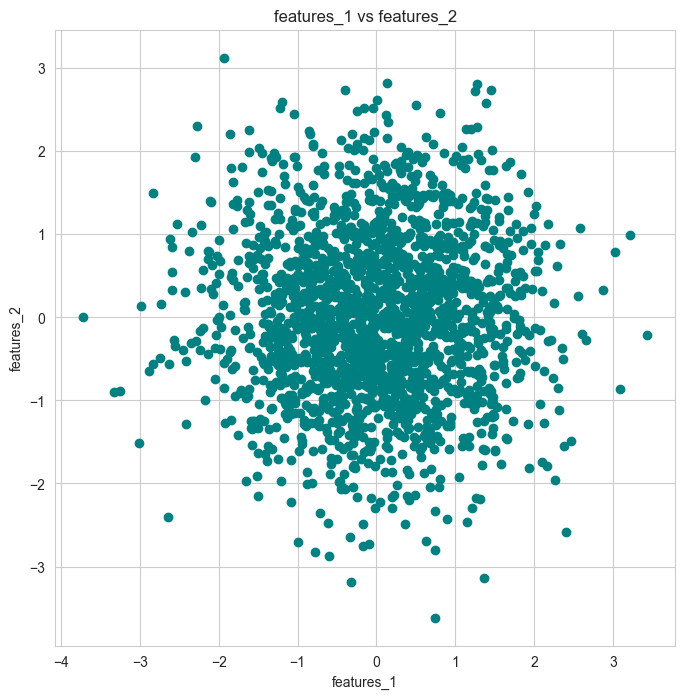

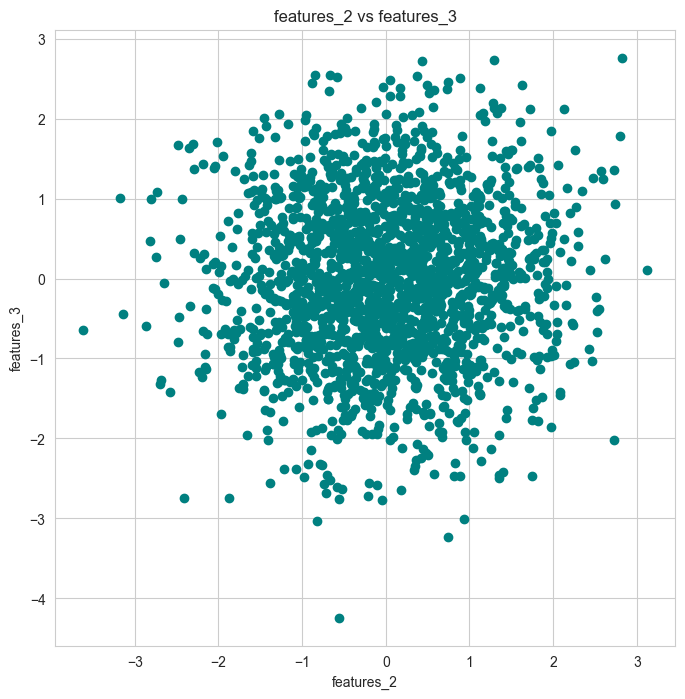

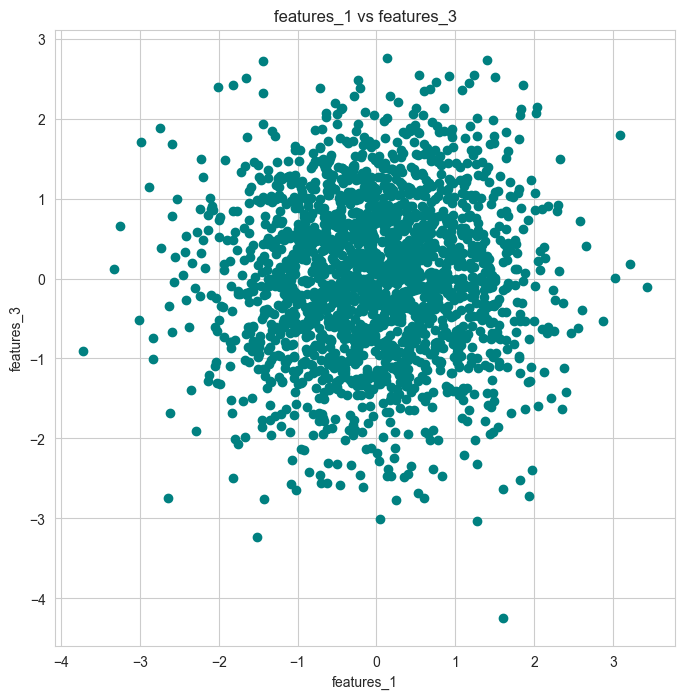

In [8]:
df = pd.read_csv('regression_generated.csv')
#print(df)
f1 = df.features_1
f2 = df.features_2
f3 = df.features_3

fig1 = plt.figure(num='Figure 1', figsize=(8, 8))
plt.scatter(f1, f2, color='teal')
plt.title('features_1 vs features_2')
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()

fig2 = plt.figure(num='Figure 2', figsize=(8, 8))
plt.scatter(f2, f3, color='teal')
plt.title('features_2 vs features_3')
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()

fig3 = plt.figure(num='Figure 3', figsize=(8, 8))
plt.scatter(f1, f3, color='teal')
plt.title('features_1 vs features_3')
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()

# There is no correlation beetween the three features

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

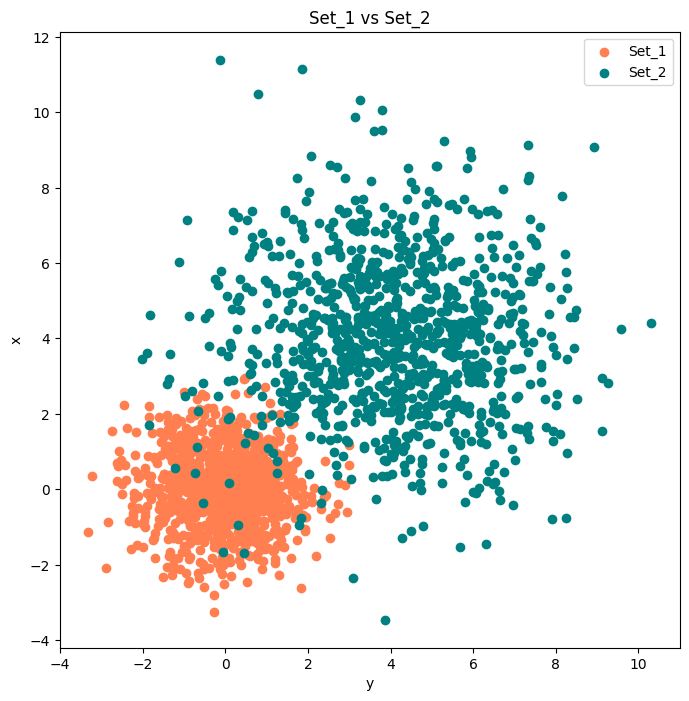

In [4]:
# vectors of normal distributed elements
mu1, sigma1, size1 = 0, 1, 1000 # set mean, standard deviation and size
s1_x = np.random.normal(mu1, sigma1, size1)
s1_y = np.random.normal(mu1, sigma1, size1)

mu2, sigma2, size2 = 4, 2, 1000 # set mean, standard deviation and size
s2_x = np.random.normal(mu2, sigma2, size2)
s2_y = np.random.normal(mu2, sigma2, size2)

fig4 = plt.figure(num='Figure 4', figsize=(8, 8))
plt.scatter(s1_x, s1_y, color='coral')
plt.scatter(s2_x, s2_y, color='teal')
plt.title('Set_1 vs Set_2')
plt.xlabel('y')
plt.ylabel('x')
plt.legend(['Set_1', 'Set_2'])
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

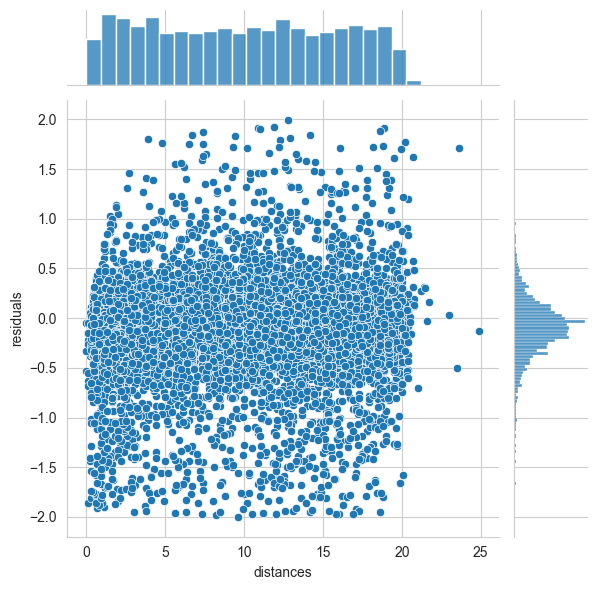

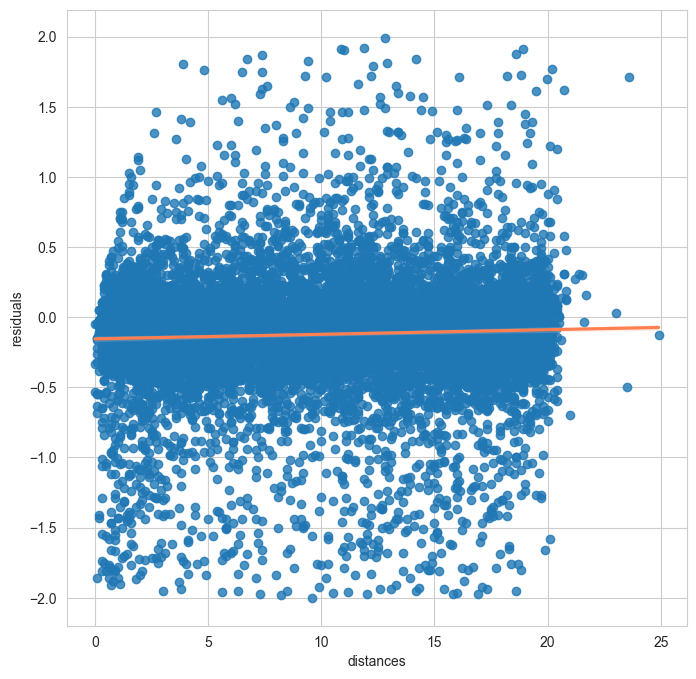

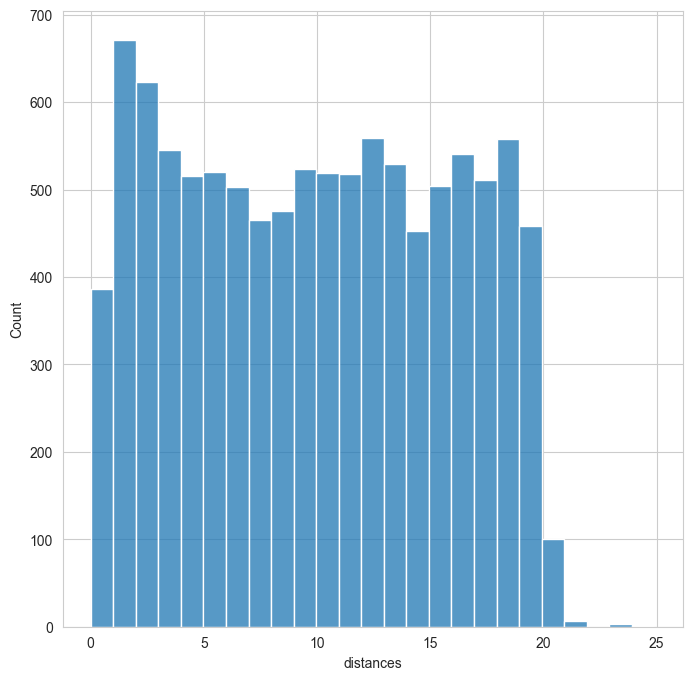

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5]
Bins
(0, 1]     -0.237466
(1, 2]     -0.136383
(2, 3]     -0.176092
(3, 4]     -0.155191
(4, 5]     -0.133071
(5, 6]     -0.135967
(6, 7]     -0.102466
(7, 8]     -0.078595
(8, 9]     -0.094091
(9, 10]    -0.101718
(10, 11]   -0.046796
(11, 12]   -0.097155
(12, 13]   -0.087697
(13, 14]   -0.128588
(14, 15]   -0.157604
(15, 16]   -0.125458
(16, 17]   -0.131547
(17, 18]   -0.169034
(18, 19]   -0.116290
(19, 20]   -0.049366
(20, 21]    0.051854
(21, 22]    0.201333
(22, 23]    0.028571
(23, 24]    0.605000
(24, 25]   -0.128571
Name: residuals, dtype: float64
Bins
(0, 1]      0.487045
(1, 2]      0.421615
(2, 3]      0.424607
(3, 4]      0.413690
(4, 5]      0.380857
(5, 6]      0.412435
(6, 7]      0.431422
(7, 8]      0.459140
(8, 9]      0.425644
(9, 10]     0.423532
(10, 11]    0.451461
(11, 12]    0.477092
(12, 13]    0.492758
(13, 14]    0.45441

/var/folders/jz/fbg3_6jd23l2_w01fdq312hh0000gn/T/ipykernel_832/2173116243.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Bins'] = pd.cut(dfc['distances'], Pandas_bins)


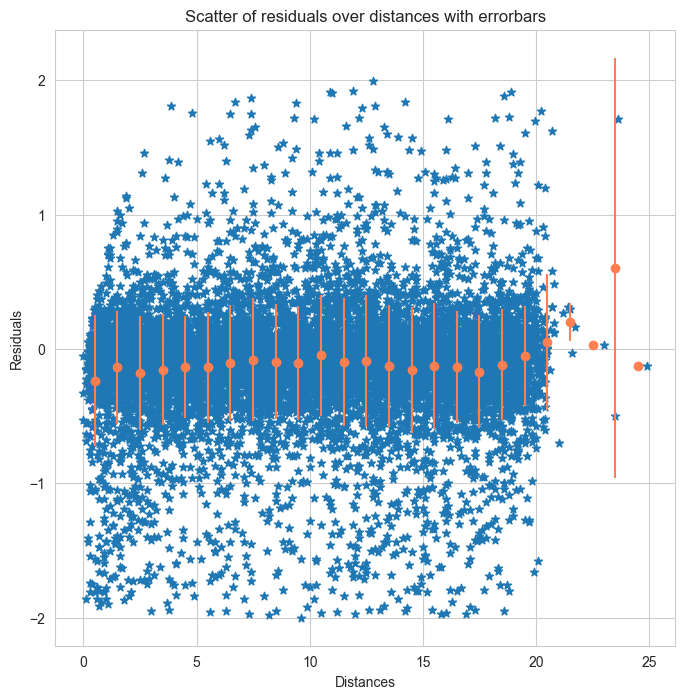

In [11]:
#read pickle and convert it to dataframe
p = pd.read_pickle('residuals_261.pkl').tolist()
df = pd.DataFrame(p)

#Clean the sample by selecting the entries with the absolute values of the variable "residual" smaller than 2
dfc = df.loc[ abs(df['residuals']) < 2]
#print(dfc)

#plot a Seaborn jointplot of "residuals" versus "distances"
#fig5 = plt.figure(num="Figure 5", figsize=(8, 8))
sns.set_style('whitegrid')
sns.jointplot(data=dfc, x='distances', y='residuals')
plt.show()

#display a linear regression
fig6 = plt.figure(num='Figure 6', figsize=(8, 8))
sns.set_style('whitegrid')
sns.regplot(data=dfc, x='distances', y='residuals', line_kws={'color': 'coral'} )
plt.show()


#Create manually (without using seaborn) the profile histogram for the "distance" variable
upper_bound = int(np.ceil(dfc['distances'].max()))
lower_bound = int(np.floor(dfc['distances'].min()))
ndatas = len(dfc)
nbin = 25

fig7 = plt.figure(num='Figure 7', figsize=(8, 8))
sns.histplot(x=dfc['distances'], bins=nbin)
plt.show()


# x 
width = int(upper_bound/nbin)
bins = []
x = []
for i in range(lower_bound, upper_bound, width):
    bins.append((i, i+width))
    x.append(statistics.mean([i, i+width]))

print(x)

# y 
Pandas_bins = pd.IntervalIndex.from_tuples(bins)
dfc['Bins'] = pd.cut(dfc['distances'], Pandas_bins)

y = dfc.groupby(['Bins'])['residuals'].mean()
print(y)

# err_y 
err_y = dfc.groupby(['Bins'])['residuals'].std()
print(err_y)

fig8 = plt.figure(num="Figure 8", figsize=(8, 8))
plt.scatter( x = dfc['distances'], y=dfc['residuals'], marker='*')
plt.errorbar( x, y, yerr = err_y, fmt = 'o', color='coral')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter of residuals over distances with errorbars')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


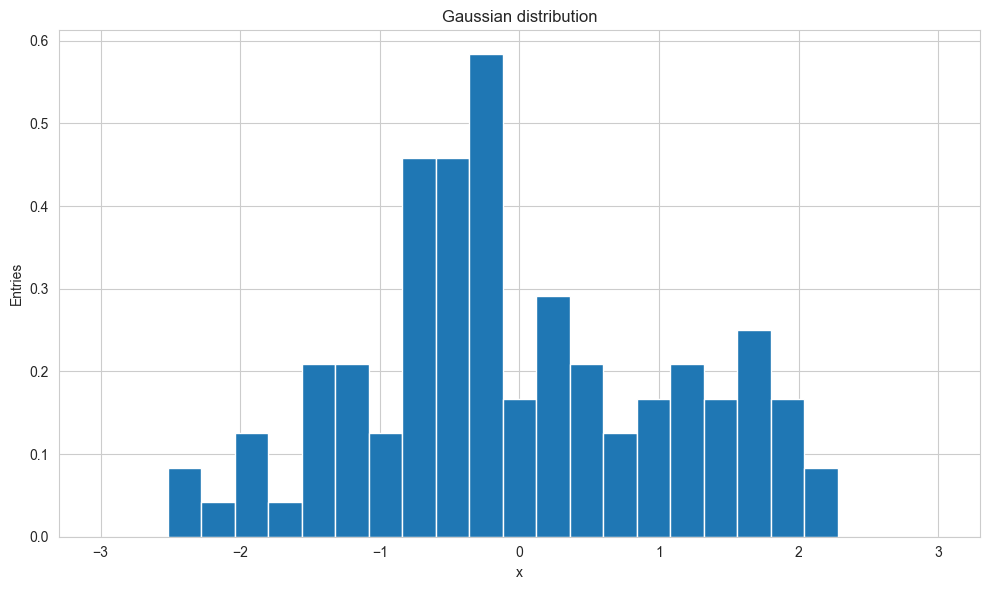

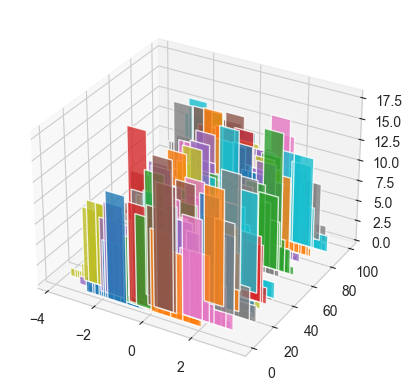

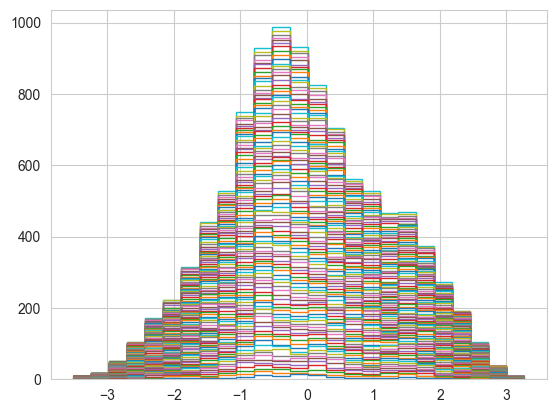

In [18]:
mu, sigma, N = 0, 1, 100  # mean and standard deviation

#Fill a numpy array x of length N (with N=O(100)) with a variable normally distributed
x = np.random.normal(mu, sigma, N)

fig9 = plt.figure(num="Figure 9", figsize=(10, 6)) # create the figure and the axes
h, bins, _ = plt.hist(x, bins=25, range=(-3, +3), density=True, cumulative=False) # create and plot the histogram


# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax = fig9.axes[0]
ax.set_title('Gaussian distribution')
ax.set_xlabel('x')

#set a proper y axis label
ax.set_ylabel('Entries')
fig9.tight_layout()
plt.show()

#errors


#For every element of x, create a gaussian with the mean corresponding to the element value 
#and the standard deviation as a parameter that can be tuned. The standard deviation default value should be: (see github)
#you can use the scipy function stats.norm() for that.

std_x = 1.06 * x.std() * (x.size)**(-1/5)
#lin = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x_i = np.zeros((100, 100))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 25

for i in range(len(x)):
    mu_i = x[i] #set the mean equal to the corresponding element value
    x_i[i,:] = np.random.normal(mu_i, std_x, N) #i-th row is the gaussian of i-th x
    #plt.plot(lin, sts.norm.pdf(x, mu_i, std_x))
    hist, bins = np.histogram(x_i[i,:], bins=nbins)
    xs = (bins[:-1] + bins[1:])/2
    ax.bar(xs, hist, zs=i, zdir='y', alpha=0.8)
plt.show()
#In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
#fig10 = plt.figure(num='Figure 10', figsize = (10, 6))

plt.hist(x_i, bins=25, histtype='step', stacked=True, fill=False)
#plt.plot(x_i, sts.gaussian_kde)
plt.show()